# Lenovo Y27q-20 Video Gain Drive Linear Regression

In [146]:
import numpy
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

## Observations

In [147]:
# These observations map numbers read from the VESA MCCS API to numbers shown on the OSD (on-screen display) for the
# red, green, and blue video gain drive channels. In each observation, the first value represents the API (independent
# variable aka "x"), and the second value represents the OSD (dependent variable aka "y"). Some observations have been
# removed from the front and back of this data set because they hit boundaries and would confuse the linear regression.
observations = [
    # Anything below x = 12 results in y = 0.
    [12, 2],
    [13, 5],
    [14, 7],
    [15, 10],
    [16, 13],
    [17, 15],
    [18, 18],
    [19, 20],
    [20, 23],
    [21, 25],
    [22, 28],
    [23, 30],
    [24, 33],
    [25, 35],
    [26, 38],
    [27, 40],
    [28, 43],
    [29, 46],
    [30, 48],
    [31, 51],
    [32, 53],
    [33, 56],
    [34, 58],
    [35, 61],
    [36, 63],
    [37, 66],
    [38, 68],
    [39, 71],
    [40, 74],
    [41, 76],
    [42, 79],
    [43, 81],
    [44, 84],
    [45, 86],
    [46, 89],
    [47, 91],
    [48, 94],
    [49, 96],
    [50, 99],
    # Anything above x = 50 results in y = 100.
]
x_observations = [x for x, y in observations]
y_observations = [y for x, y in observations]

## Model

In [148]:
x_array = numpy.array(x_observations).reshape(-1, 1)
y_array = numpy.array(y_observations)
model = LinearRegression().fit(x_array, y_array)
print(f'R^2 (coefficient of determination): {model.score(x_array, y_array)}')
print(f'm (slope): {model.coef_[0]}')
print(f'b (intercept): {model.intercept_}')
print(f'line function: y = {model.coef_[0]}x + {model.intercept_}')

R^2 (coefficient of determination): 0.9998992555886645
m (slope): 2.5421052631578958
b (intercept): -28.16423751686913
line function: y = 2.5421052631578958x + -28.16423751686913


## Chart

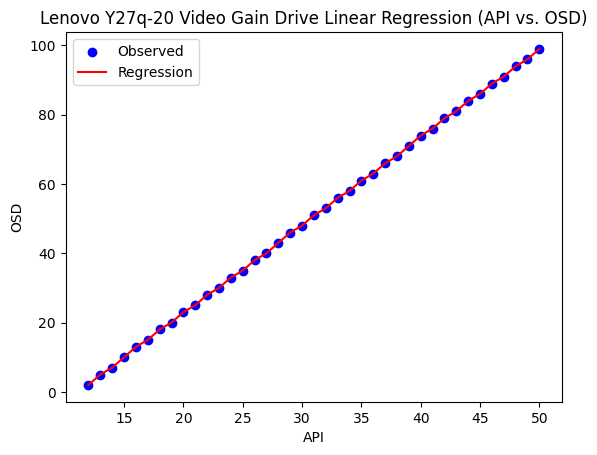

In [149]:
y_predictions_rounded = [
    round(model.coef_[0] * x_observation + model.intercept_)
    for x_observation
    in x_observations
]
pyplot.scatter(x_observations, y_observations, color='blue', label='Observed')
pyplot.plot(x_observations, y_predictions_rounded, color='red', label='Regression')
pyplot.title('Lenovo Y27q-20 Video Gain Drive Linear Regression (API vs. OSD)')
pyplot.xlabel('API')
pyplot.ylabel('OSD')
pyplot.legend()
pyplot.show()

## Manual Verification (Hits and Misses)

In [150]:
for i in range(len(y_observations)):
    y_obs = y_observations[i]
    y_prr = y_predictions_rounded[i]
    print(y_obs, y_prr, 'hit' if y_obs == y_prr else 'miss')

2 2 hit
5 5 hit
7 7 hit
10 10 hit
13 13 hit
15 15 hit
18 18 hit
20 20 hit
23 23 hit
25 25 hit
28 28 hit
30 30 hit
33 33 hit
35 35 hit
38 38 hit
40 40 hit
43 43 hit
46 46 hit
48 48 hit
51 51 hit
53 53 hit
56 56 hit
58 58 hit
61 61 hit
63 63 hit
66 66 hit
68 68 hit
71 71 hit
74 74 hit
76 76 hit
79 79 hit
81 81 hit
84 84 hit
86 86 hit
89 89 hit
91 91 hit
94 94 hit
96 96 hit
99 99 hit
